<a href="https://colab.research.google.com/github/SterlinPeter/BE_Project/blob/master/Disease_Prediction_from_symptoms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Modules

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings 
warnings.filterwarnings("ignore")

##Loading the dataset

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/SterlinPeter/BE_Project/master/dataset/dataset.csv').dropna(axis=1)

##Getting dataset information

In [49]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,encoded_prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,15
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Allergy,4
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,GERD,16
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Chronic cholestasis,9
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Drug Reaction,14


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Columns: 134 entries, itching to encoded_prognosis
dtypes: int64(133), object(1)
memory usage: 5.1+ MB


In [35]:
disease_counts = df["prognosis"].value_counts()
print(disease_counts)

Fungal infection                           122
Hepatitis C                                121
Hepatitis E                                121
Alcoholic hepatitis                        121
Tuberculosis                               121
Common Cold                                121
Pneumonia                                  121
Dimorphic hemmorhoids(piles)               121
Heart attack                               121
Varicose veins                             121
Hypothyroidism                             121
Hyperthyroidism                            121
Hypoglycemia                               121
Osteoarthristis                            121
Arthritis                                  121
(vertigo) Paroymsal  Positional Vertigo    121
Acne                                       121
Urinary tract infection                    121
Psoriasis                                  121
Hepatitis D                                121
Hepatitis B                                121
Allergy      

##Encoding string objects

In [51]:
le = LabelEncoder()
le.fit(df['prognosis'])
df['encoded_prognosis'] = le.transform(df['prognosis'])


##Splitting data into training and testing data

In [37]:
X = df.iloc[:, :-2]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2529)

##Training Naive Bayes model with metrics

In [38]:
nbmodel = GaussianNB()
nbmodel.fit(X_train, y_train)
nbpreds = nbmodel.predict(X_test)

Gausssian NB Accuracy score:  1.0


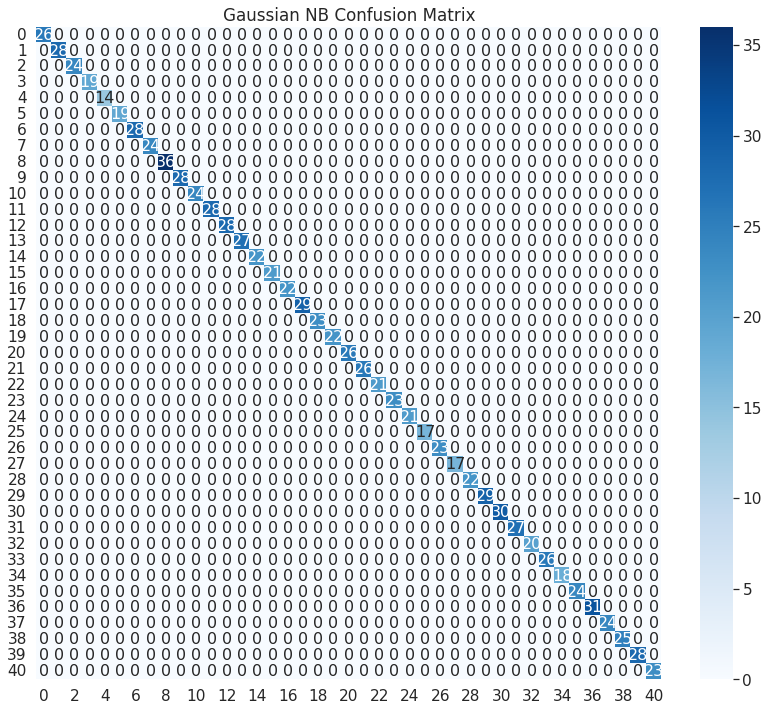

In [39]:
print("Gausssian NB Accuracy score: ", accuracy_score(y_test, nbpreds))
confmatrix = confusion_matrix(y_test, nbpreds)
plt.figure(figsize=(14,12))
sns.set(font_scale=1.4)
sns.heatmap(confmatrix, annot=True, annot_kws={"size": 16}, cmap="Blues")
plt.title("Gaussian NB Confusion Matrix")
plt.show()

##Training Random Forest Classifier with metrics

In [40]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfcpreds = rfc.predict(X_test)

Random Forest Classifier Accuracy score:  1.0


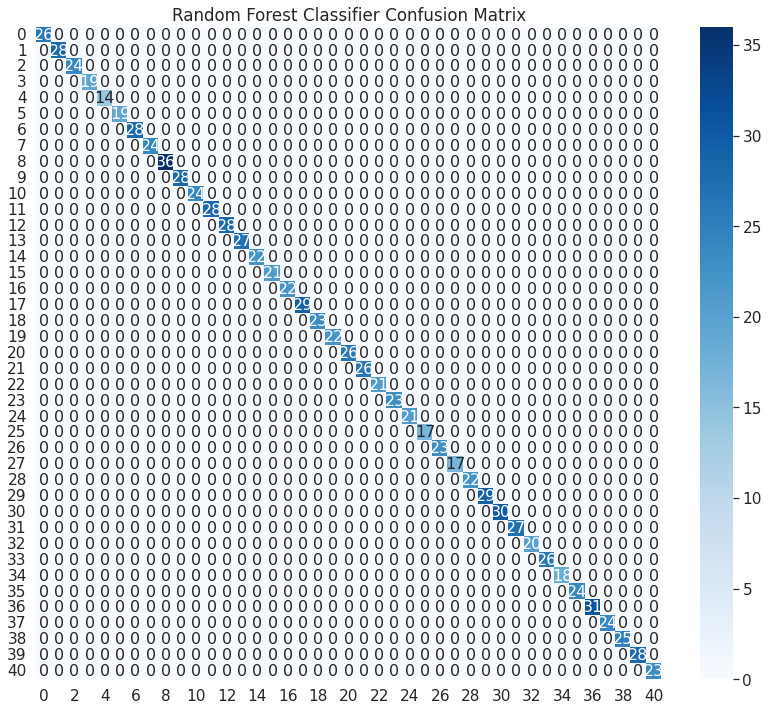

In [41]:
print("Random Forest Classifier Accuracy score: ", accuracy_score(y_test, rfcpreds))
conf_matrix = confusion_matrix(y_test, rfcpreds)
plt.figure(figsize=(14,12))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap="Blues")
plt.title("Random Forest Classifier Confusion Matrix")
plt.show()

##Creating a function to convert data into appropriate format for model for prediction

In [47]:
e_classes = le.classes_
symptoms_dict = {}
for index, symptom in enumerate(X.columns.values):
  symptoms_dict[symptom] = index

def predictDisease(symptoms):
  labelled_data = [0 for _ in range(len(symptoms_dict))]
  symptoms = symptoms.split(',')
  for symptom in symptoms:
    symptom = '_'.join(symptom.lower().split())
    labelled_data[symptoms_dict[symptom]] = 1

  labelled_data = np.array(labelled_data).reshape(1,-1)

  gnb_pred = e_classes[nbmodel.predict(labelled_data)[0]]
  rfc_pred = e_classes[rfc.predict(labelled_data)[0]]
  print("Disease by Naive Bayes: ", gnb_pred)
  print("Disease by Random Forest: ", rfc_pred)


In [48]:
predictDisease("Itching,Skin Rash,Nodal Skin Eruptions")
predictDisease("Acidity,Indigestion,Headache,stiff neck,depression,irritability,blurred and distorted vision,excessive hunger,visual disturbances")

Disease by Naive Bayes:  Fungal infection
Disease by Random Forest:  Fungal infection
Disease by Naive Bayes:  Migraine
Disease by Random Forest:  Migraine
